In [1]:
from stack import Stack
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

crange = [-0.5,0.5]
cmap = 'RdBu_r'

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/earthquake.py:179: UserWarning: Using existing /Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/Datasets/Seismicity_datasets/global_earthquakes_35.csv
  warnings.warn(f"Using existing {filename}")
/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/earthquake.py:185: UserWarning: 1332 NaN values found in catalog. Removing rows with NaN values.
  warnings.warn(


## Sensitivity to space window

In [12]:
N = 5
D_sub_range = [2,50]    # km
D_SSE_range = [10, 100] # km
D_sub = np.linspace(*D_sub_range,N)
D_SSE = np.linspace(*D_SSE_range,N)

In [13]:
space_grid = np.zeros((N,N))
for i,d_sub in enumerate(D_sub):
    for j, d_sse in enumerate(D_SSE):
        space_grid[i,j] = Stack(REPRESENTATIVE_SSE_SIZE=d_sse, DISTANCE_TO_SLAB=d_sub).average_rate_increase()

/Users/kdascher/Documents/Documents - Kelian’s MacBook Pro/Projects/Slow_slip_meta_analysis/src/data/slab2.py:138: UserWarning: xyz contains negative depths
  warnings.warn("xyz contains negative depths")


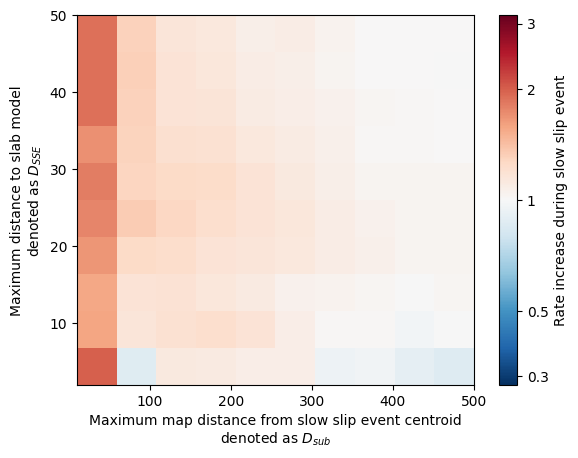

In [ ]:
fig, ax = plt.subplots()
gr = ax.imshow(np.log10(space_grid), cmap=cmap, origin='lower',extent=[*D_SSE_range,*D_sub_range], vmin=crange[0],vmax=crange[1],aspect='auto')

ax.set(
    ylabel='Maximum distance to slab model\ndenoted as $D_{SSE}$',
    xlabel='Maximum map distance from slow slip event centroid\ndenoted as $D_{sub}$',
)

cax=fig.colorbar(gr)
cax.set_label('Rate increase during slow slip event')
cax.set_ticks(np.log10([0.3333,0.5,1,2,3]))
cax.set_ticklabels([0.3,0.5,1,2,3])

## Sensitivity to the magnitude of completeness

In [5]:
N = 10

Mc_str = "Minimum magnitude threshold for earthquake catalog"
Mc_range = [3.8,5.5]    # km

Mmin_str = "Minimum magnitude threshold for slow slip event catalog"
Mmin_range = [5,7] # km
Mc = np.linspace(*Mc_range,N)
Mmin = np.linspace(*Mmin_range,N)

In [ ]:
mag_grid = np.zeros((N,N))
for i,mc in enumerate(Mc):
    for j, mmin in enumerate(Mmin):
        mag_grid[i,j] = Stack(EARTHQUAKE_MAGNITUDE_CUTOFF=mc, SLOWSLIP_MAGNITUDE_CUTOFF=mmin).average_rate_increase()

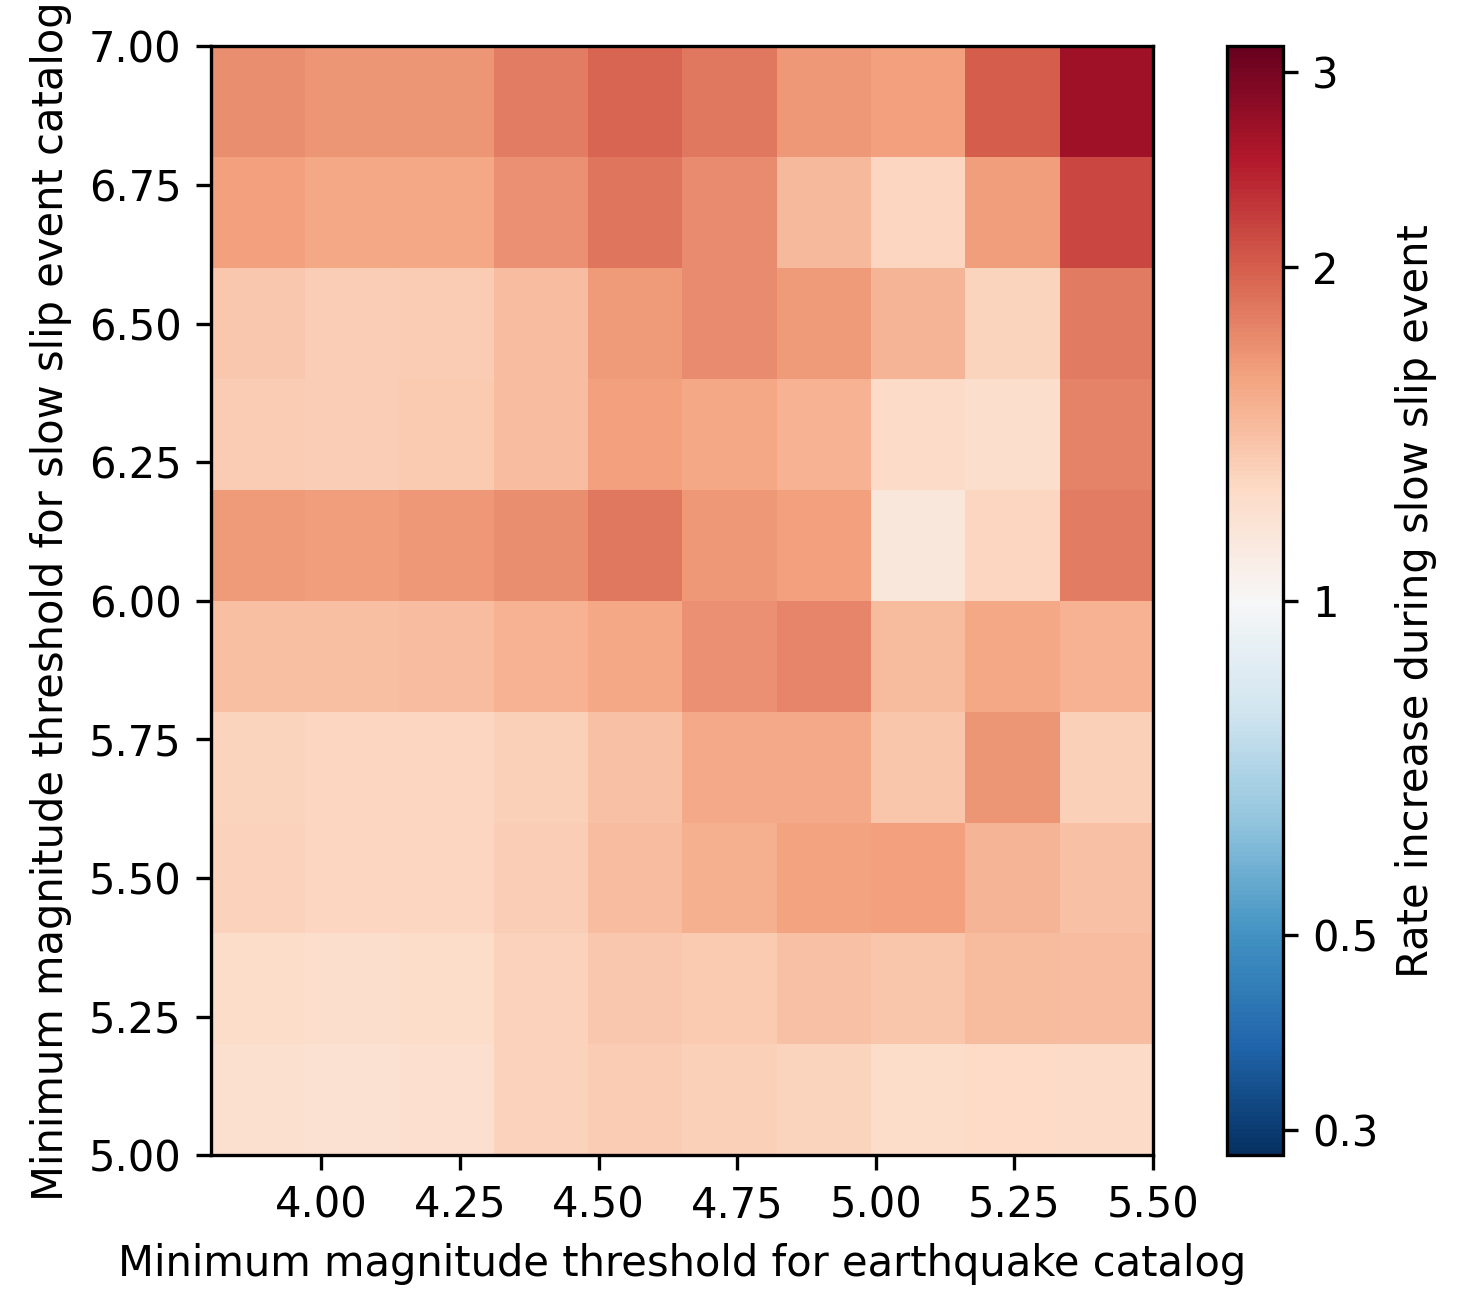

In [ ]:
fig, ax = plt.subplots(dpi=300)
gr = ax.imshow(np.log10(mag_grid), cmap=cmap, origin='lower',extent=[*Mc_range,*Mmin_range],vmin=crange[0],vmax=crange[1])

ax.set(
    xlabel=Mc_str,
    ylabel=Mmin_str,
)

cax = fig.colorbar(gr)
cax.set_label('Rate increase during slow slip event')
cax.set_ticks(np.log10([0.3333,0.5,1,2,3]))
cax.set_ticklabels([0.3,0.5,1,2,3])